# Import

In [1]:
import scipy.optimize
import matplotlib.lines
import math, matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import statistics

In [2]:
from MHP import MHP
P = MHP()
df= P.generate_seq(100)

Max eigenvalue: 0.50000


C:\Users\marco\Documents\sistemi-complessi\MHP.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.data = np.array(self.data)


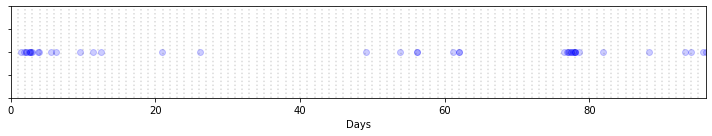

In [3]:
P.plot_events()

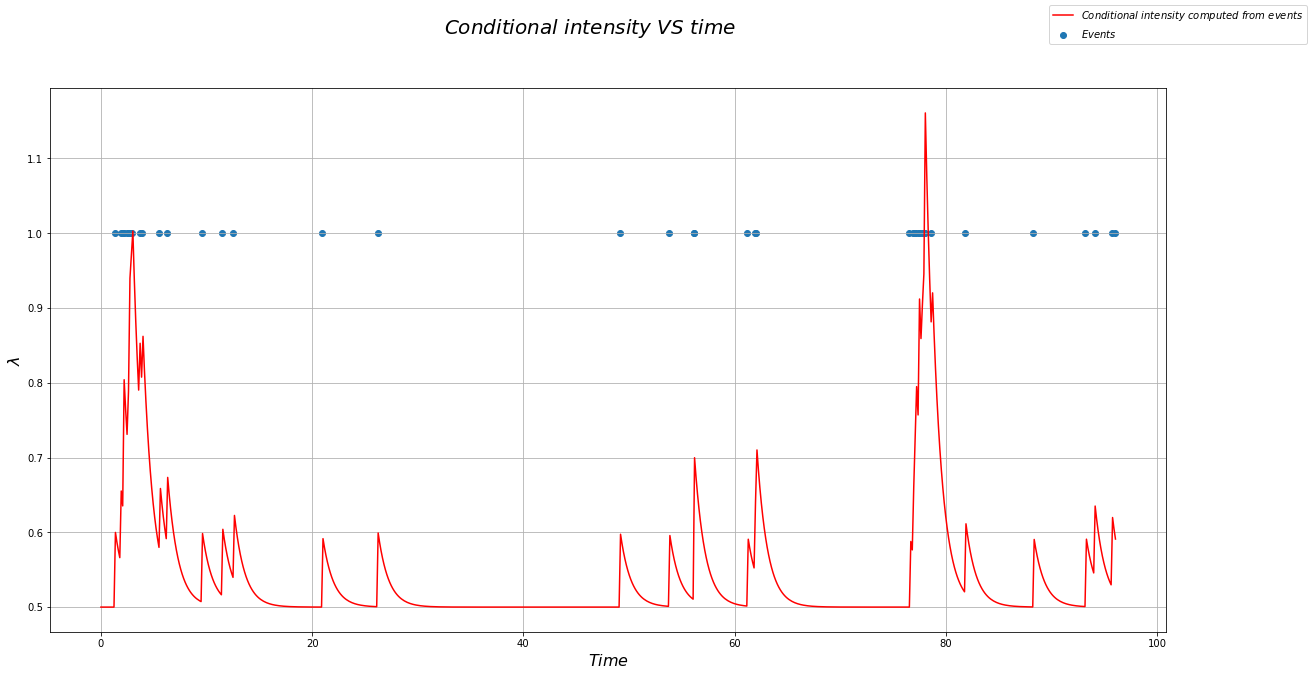

In [4]:

mu = 0.5 
alpha = 0.1
beta = 1.0

EventTimes = df[:, 0]

" Compute conditional intensities for all times using the Hawkes process. "
timesOfInterest = np.linspace(0.0, df[-1,0], 700) # Times where the intensity will be sampled.
conditionalIntensities = [] # Conditional intensity for every epoch of interest.
for t in timesOfInterest:
     conditionalIntensities.append( mu + np.array( [alpha*math.exp(-beta*(t-ti)) if t > ti else 0.0 for ti in EventTimes] ).sum() ) # Find the contributions of all preceding events to the overall chance of another one occurring. All events that occur after t have no contribution.

" Plot the conditional intensity time history. "
fig = plt.figure(figsize=(20,10))
ax = fig.gca()

labelsFontSize = 16
ticksFontSize = 14

fig.suptitle(r"$Conditional\ intensity\ VS\ time$", fontsize=20)
ax.grid(True)
ax.set_xlabel(r'$Time$',fontsize=labelsFontSize)
ax.set_ylabel(r'$\lambda$',fontsize=labelsFontSize)
matplotlib.rc('xtick', labelsize=ticksFontSize) 
matplotlib.rc('ytick', labelsize=ticksFontSize)

eventsScatter = ax.scatter(EventTimes,np.ones(len(EventTimes))) # Just to indicate where the events took place.

ax.plot(timesOfInterest, conditionalIntensities, color='red', linestyle='solid', marker=None, markerfacecolor='blue', markersize=12)
fittedPlot = matplotlib.lines.Line2D([],[],color='red', linestyle='solid', marker=None,  markerfacecolor='blue', markersize=12)

fig.legend([fittedPlot, eventsScatter], [r'$Conditional\ intensity\ computed\ from\    events$', r'$Events$'])
plt.show()

In [5]:
" Find a fit for alpha, beta, and mu that minimises loglikelihood for the input data. "
def loglikelihood(x, *args):
    for x in timesOfInterest:
        return mu + np.array( [alpha*math.exp(-beta*(x-ti)) if x > ti else 0.0 for ti in EventTimes] ).sum()


res = scipy.optimize.minimize(loglikelihood, (1, 0.2,0.1), method='Nelder-Mead', args = (mu, alpha, beta))
(mu, alpha, beta) =  res.x
print(res.x)

[1.  0.2 0.1]


In [8]:
P.EM(ahat, mhat, b)

NameError: name 'w' is not defined